In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import utils

In [10]:
df = utils.pre_process_df()
df

,Age,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Female,Male,First-time,Returning,Business,Personal
ID,,,,,,,,,,,,,,,,,,,,,
1,48,2,821,2,5,3,3,4,3,3,...,3,5,5,0,0,1,1,0,1,0
2,35,2,821,26,39,2,2,3,5,2,...,2,5,5,1,1,0,0,1,1,0
3,41,2,853,0,0,4,4,4,5,4,...,4,3,3,1,0,1,0,1,1,0
4,50,2,1905,0,0,2,2,3,4,2,...,2,5,5,1,0,1,0,1,1,0
5,49,2,3470,0,1,3,3,3,5,3,...,3,3,3,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129876,28,1,447,2,3,4,4,4,4,2,...,4,4,4,0,0,1,0,1,0,1
129877,41,1,308,0,0,5,3,5,3,4,...,3,2,5,0,0,1,0,1,0,1
129878,42,1,337,6,14,5,2,4,2,1,...,2,3,5,0,0,1,0,1,0,1


In [3]:
# Check column types
non_numeric_columns = []
cols_w_missing_values = []

for col in df.columns:
    if not pd.api.types.is_integer_dtype(df[col]):
        non_numeric_columns.append((col, df[col].dtype))
    if df[col].isnull().sum() > 0:
        cols_w_missing_values.append(col)

# Print result
if len(non_numeric_columns) == 0:
    print("All columns are int or float.\n")
else:
    print("There are columns that are not int:")
    for col, dtype in non_numeric_columns:
        print(f"Column: {col}, Type: {dtype}")
        
        
if len(cols_w_missing_values) == 0:
    print("No columns have missing values.")
else:
    print("Columns with missing values:")
    for col in cols_w_missing_values:
        print(f"Column: {col}")

All columns are int or float.

No columns have missing values.


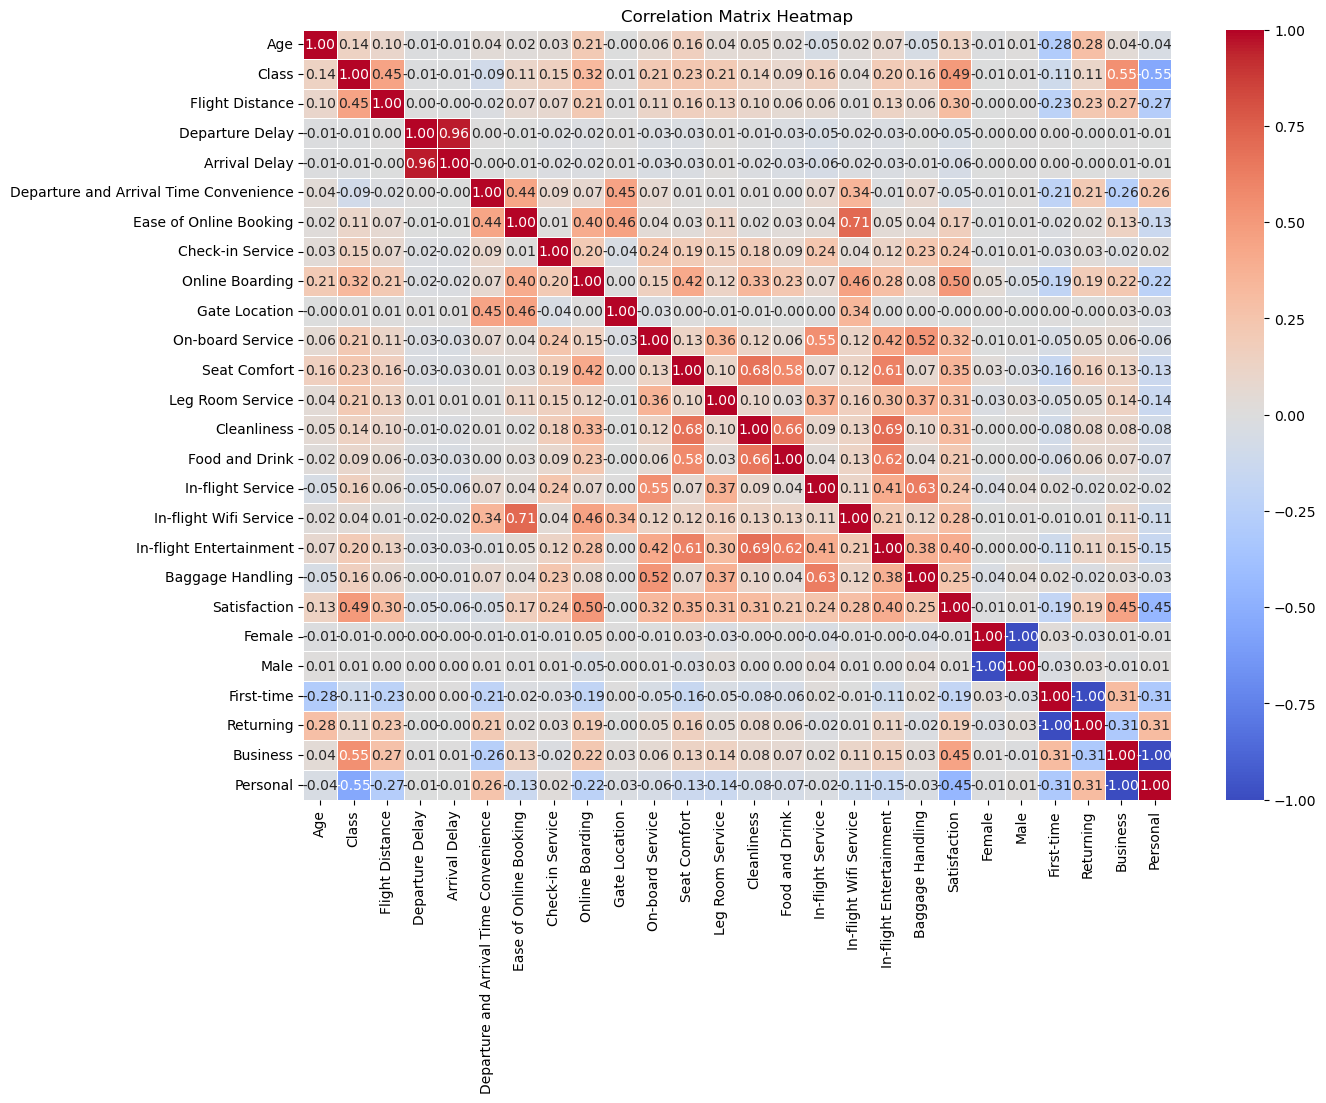

In [4]:
utils.visualize_correlation(df)

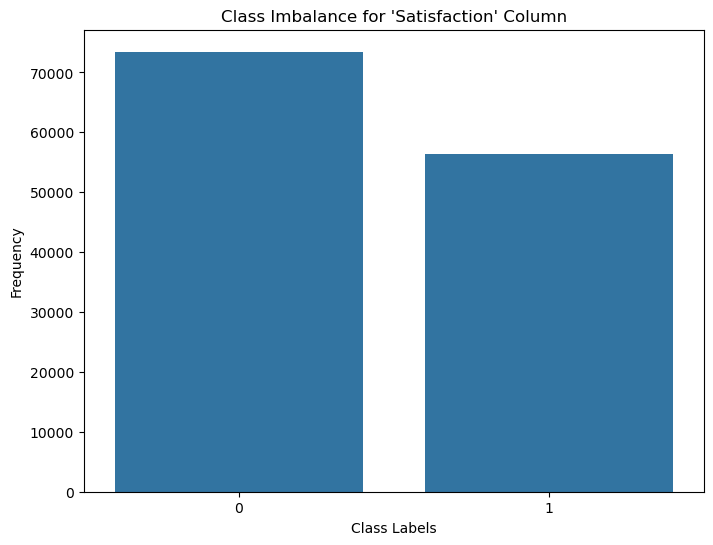

In [5]:
# Verify class imbalance of the Target

utils.visualize_class_imbalance(df)

As we see there is an imbalance in the classes. We will SMOTE to balance the classes.

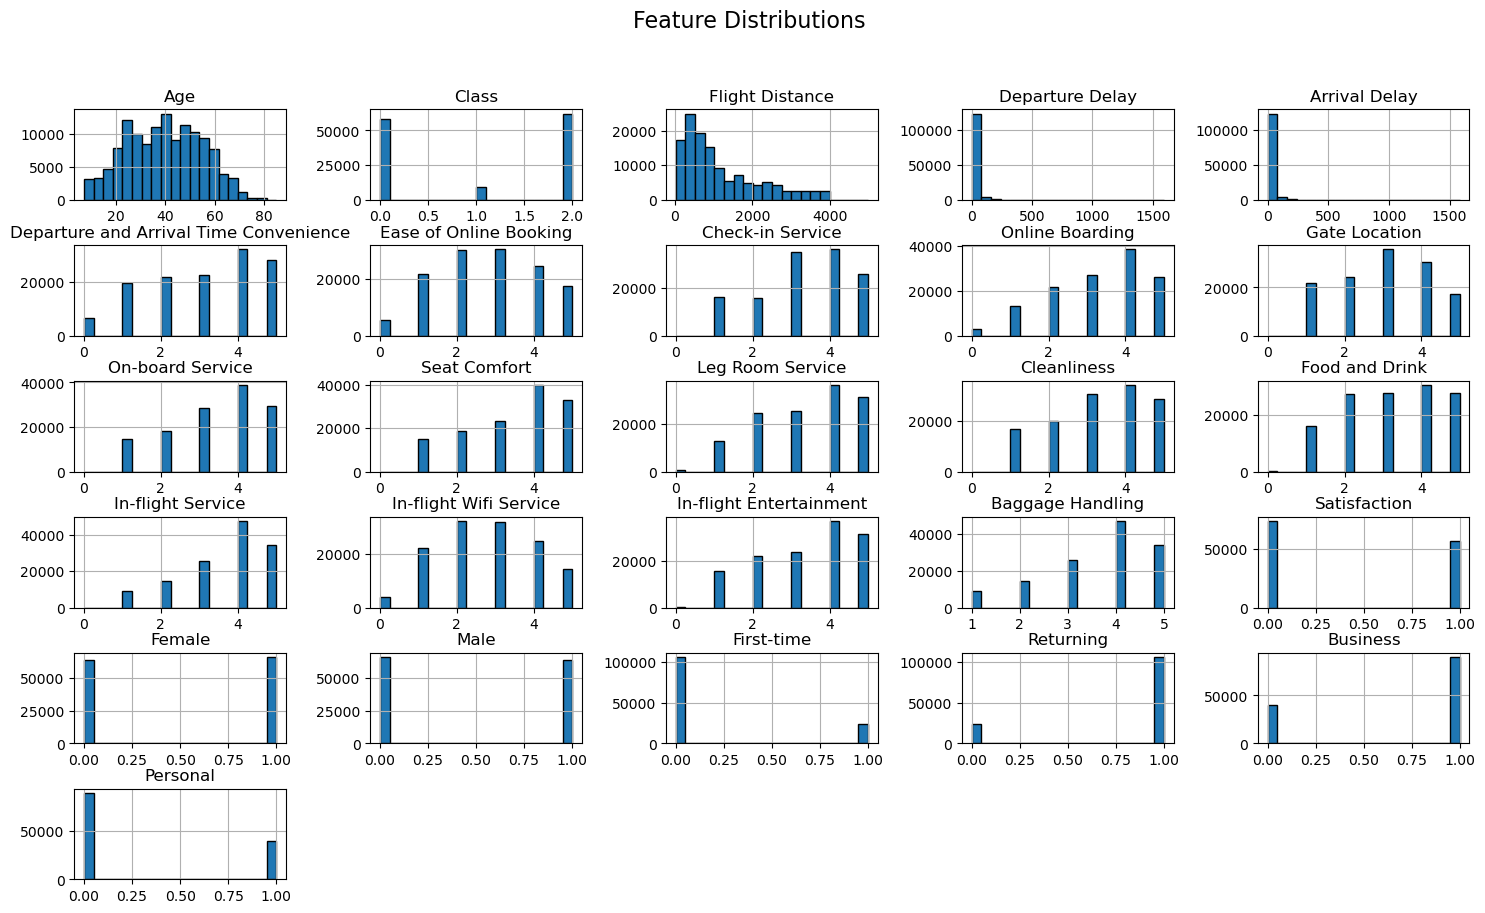

In [6]:
utils.visualize_feature_distributions(df)

In [ ]:
## DECISION TREE

tree = DecisionTreeClassifier(random_state=42)

accuracy = utils.classification_accuracy(df, tree)
cv_score = utils.classification_cv(df, tree)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Tree Depth: 38
Number of Leaves: 4539
Number of Nodes: 9077
Internal Nodes: 4538
Leaf Nodes: 4539


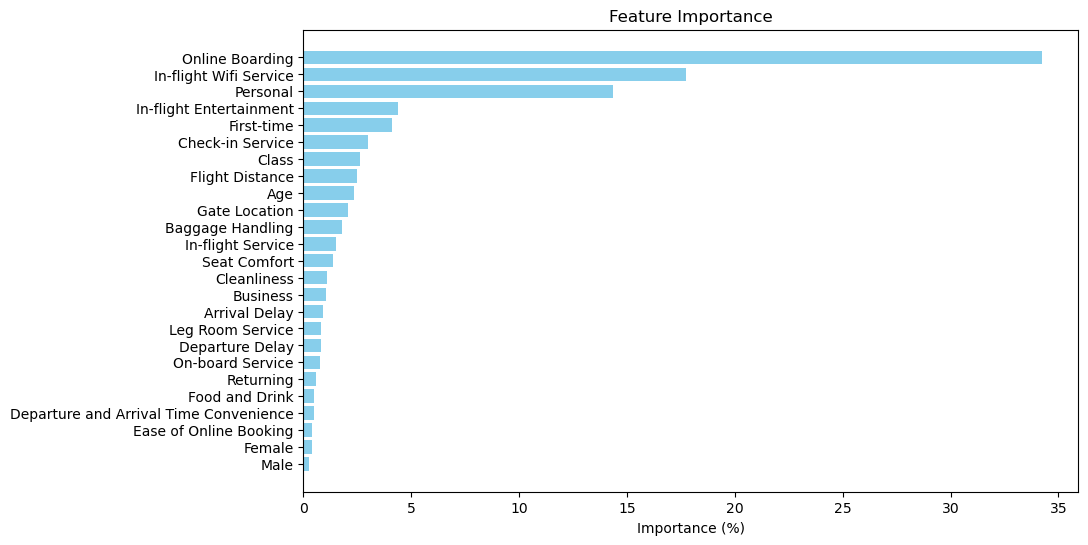

In [13]:
utils.analyze_tree_complexity(tree, df)

In [14]:
### RANDOM FOREST

forest = RandomForestClassifier(random_state=42)

accuracy = utils.classification_accuracy(df, forest)
cv_score = utils.classification_cv(df, forest)

print(f"Holdout Accuracy: {accuracy}%\nCross-Validation Accuracy: {cv_score}%")

Accuracy: 96.2%
CV Score: 96.1%


In [15]:
utils.apply_simplification_based_xai(forest,df)

Surrogate Model Accuracy: 0.883


In [ ]:
utils.apply_feature_based_xai(forest,df)

Permutation Importance:


In [ ]:
utils.apply_simplification_based_xai(forest,df)